In [2]:
import matplotlib.pyplot as plt
import sklearn.decomposition
import pandas
x = pandas.read_csv('train.csv',index_col='id')
y = x['loss'].values
x = x.drop(columns=['loss'])

Xcont = x.drop(columns=[col for col in x.columns if col.startswith('cat')])
Xcat = x.drop(columns=[col for col in x.columns if col.startswith('cont')])

X = pandas.get_dummies(x,drop_first=True,columns = [col for col in x.columns if col.startswith('cat')])


In [ ]:
from sklearn import decomposition
from sklearn.model_selection import train_test_split
import numpy

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time, numpy
raise RuntimError
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
    "RF": RandomForestRegressor(n_estimators=100, n_jobs=-1),
   # "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

for k,estimator in ESTIMATORS.items():
    t=time.time()
    
    estimator.fit(X_train, y_train)
    trainTime = time.time()-t
    t = time.time()
    
    y_pred = estimator.predict(X_test)
    predictTime = time.time()-t
    error = numpy.sum(numpy.abs(y_pred - y_test)) / len(y_test)
    print(time.ctime(),k,error,trainTime,predictTime)
    t=time.time()
    
    estimator.fit(X_train_, y_train)
    trainTime = time.time()-t
    t = time.time()
    
    y_pred = estimator.predict(X_test_)
    predictTime = time.time()-t
    error = numpy.sum(numpy.abs(y_pred - y_test)) / len(y_test)
    print(time.ctime(),k+"(reduced)",error,trainTime,predictTime)



In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, LassoCV,LassoLarsCV, SGDRegressor, ElasticNetCV
from sklearn.feature_selection import SelectFromModel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
def TestEstimator(name, estimator, X_train, y_train, X_test, y_test, tf = False):
    t=time.time()
    if tf:
        y_train_ = numpy.log1p(y_train)
    else:
        y_train_ = y_train
        
    estimator.fit(X_train, y_train_)
    trainTime = time.time()-t
    t = time.time()
    
    y_pred = estimator.predict(X_test)
    if tf:
        y_pred = numpy.expm1(y_pred)
    predictTime = time.time()-t
    
    y_train_pred = estimator.predict(X_train)
    if tf:
        y_train_pred = numpy.expm1(y_train_pred)
    
    error = numpy.sum(numpy.abs(y_pred - y_test)) / len(y_test)
    error_train = numpy.sum(numpy.abs(y_train_pred - y_train)) / len(y_train)
    #print(time.ctime(),name,error,trainTime,predictTime)
    return error_train, error #a difference here indicates 

def ExtractFeatures(estimator):
    model = SelectFromModel(estimator, prefit=True)
    return model
#linear
ridge = RidgeCV()
lin = LinearRegression()
lasso = Lasso()
#trees
ef = ExtraTreesRegressor(n_estimators=130, n_jobs=-1)
rf =  RandomForestRegressor(n_estimators=130, n_jobs=-1)
print ('lasso-full:  %.2f %.2f'%TestEstimator('lasso-full',lasso, X_train, y_train, X_test, y_test, tf=True))
#print ("gb", TestEstimator('GB-full',gb, X_train, y_train, X_test, y_test, tf=True))
 #   rf =  RandomForestRegressor(n_estimators=estimators, n_jobs=-1)
    
 #
#lasso = Lasso()
#TestEstimator('lasso',lasso, X_train, y_train, X_test, y_test, tf=True)
lassoCV = LassoCV()
lassoLarsCV = LassoLarsCV()
elastic = ElasticNetCV()
sgd = SGDRegressor(loss='huber', penalty='elasticnet',tol = 1e-3,max_iter= 1000)

print ('lasso-cv:  %.2f %.2f'%TestEstimator('lassoCV',lassoCV, X_train, y_train, X_test, y_test, tf=True))
print ('lasso-lars-cv:  %.2f %.2f'%TestEstimator('lassoLarsCV',lassoLarsCV, X_train, y_train, X_test, y_test, tf=True))

featureReducer = ExtractFeatures(lassoLarsCV)
svd = decomposition.TruncatedSVD(n_components=400)
svd.fit(X_train.values.astype('float32'))
featureReducer2 = svd
X_train_ = featureReducer.transform(X_train)
X_test_ = featureReducer.transform(X_test)
X_train__ = featureReducer2.transform(X_train)
X_test__ = featureReducer2.transform(X_test)
print ('lasso-lars-cv-r2:  %.2f %.2f'%TestEstimator('lassoLarsCV',lassoLarsCV, X_train__, y_train, X_test__, y_test, tf=True))
#print ("Reduced to",X_train_.shape,"from", X_train.shape)
#for featureCount in range(10,400,20):
#    svd = decomposition.TruncatedSVD(n_components=featureCount)
#    svd.fit(X_train.values.astype('float32'))
#    X_train_ =svd.transform(X_train)
#    X_test_ = svd.transform(X_test)
#    lasso = Lasso()
    #rf =  RandomForestRegressor(n_estimators=200, n_jobs=-1)
print ("elastic-full:     %.2f %.2f"% TestEstimator('elastic',elastic, X_train, y_train, X_test, y_test, tf=True))
print ("elastic-reduced:  %.2f %.2f"% TestEstimator('elastic',elastic, X_train_, y_train, X_test_, y_test, tf=True))
print ("elastic-reduced2: %.2f %.2f"% TestEstimator('elastic',elastic, X_train__, y_train, X_test__, y_test, tf=True))

print ("lin-reduced:      %.2f %.2f"% TestEstimator('lin',lin, X_train_, y_train, X_test_, y_test, tf=True))
print ("lin-reduced2:     %.2f %.2f"% TestEstimator('lin',lin, X_train__, y_train, X_test__, y_test, tf=True))
print ("ridge-full:       %.2f %.2f"% TestEstimator('ridge',ridge, X_train, y_train, X_test, y_test, tf=True))
print ("ridge-reduced:    %.2f %.2f"% TestEstimator('ridge',ridge, X_train_, y_train, X_test_, y_test, tf=True))
print ("ridge-reduced2:   %.2f %.2f"% TestEstimator('ridge',ridge, X_train__, y_train, X_test__, y_test, tf=True))
#print ("ridge-full", TestEstimator('ridge',ridge, X_train, y_train, X_test, y_test, tf=True))
#print ("ridge-reduced", TestEstimator('ridge',ridge, X_train_, y_train, X_test_, y_test, tf=True))

gb = GradientBoostingRegressor(n_estimators=300, loss='huber')
print ("sgd:              %.2f %.2f"% TestEstimator('sgd',sgd, X_train, y_train, X_test, y_test, tf=True))
print ("sgd-reduced:      %.2f %.2f"% TestEstimator('sgd',sgd, X_train_, y_train, X_test_, y_test, tf=True))
print ("sgd-reduced2:     %.2f %.2f"% TestEstimator('sgd',sgd, X_train__, y_train, X_test__, y_test, tf=True))

print ("gb-reduced:       %.2f %.2f"% TestEstimator('gb',gb, X_train_, y_train, X_test_, y_test, tf=True))
print ("gb-reduced2:      %.2f %.2f"% TestEstimator('gb',gb, X_train__, y_train, X_test__, y_test, tf=True))
print ("gb:               %.2f %.2f"% TestEstimator('gb',gb, X_train, y_train, X_test, y_test, tf=True))
#print (ExtractFeatures(lasso,100))
#for estimators in range(280,380,20):
#    gb = GradientBoostingRegressor(n_estimators=estimators, loss='huber')
#    print ("gb-%d"%estimators, TestEstimator('GB-full',gb, X_train, y_train, X_test, y_test, tf=True))
    

lasso-full (1812.4441228180292, 1799.756744618612)
lasso-cv:  1248.78 1245.15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 110 iterations, i.e. alpha=3.089e-05, with an active set of 108 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 142 iterations, i.e. alpha=2.322e-05, with an active set of 140 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 142 iterations, i.e. alpha=2.322e-05, with an active set of 140 regressors, and the smallest ch

lasso-lars-cv:  1245.98 1240.34
lasso-lars-cv-r2:  1247.65 1244.54
elastic-full (1248.7712193114319, 1244.992892911894)
elastic-reduced: 1250.28 1246.94
elastic-reduced2: 1252.57 1245.50
lin-reduced: 1244.63 1242.29
lin-reduced2: 1248.45 1245.83
ridge-full: 1242.29 1241.97
ridge-reduced: 1245.09 1241.92
ridge-reduced2: 1248.36 1245.68
sgd: 1300.71 1295.14
sgd-reduced: 1458.41 1448.09
sgd-reduced2: 1307.37 1301.81
gb: 1166.16 1165.00
gb-reduced: 1167.37 1166.07
gb-reduced2: 1200.14 1214.79


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.decomposition import PCA
import time, numpy
# Fit estimators
ESTIMATORS = {
   # "Extra trees": ExtraTreesRegressor(n_estimators=10,  max_features=32, 
   #                                    criterion='mae'),
   # "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
   # "Ridge": RidgeCV(),
    "MLP":  MLPRegressor(hidden_layer_sizes=(150,))
}


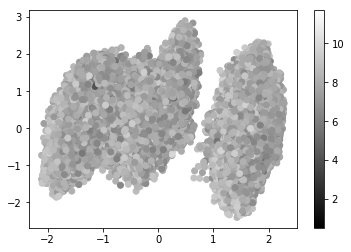

In [19]:
import numpy
plt.scatter(catScatt[:,1],catScatt[:,4],c=numpy.log1p(y),cmap='gray')
plt.colorbar()
plt.show()

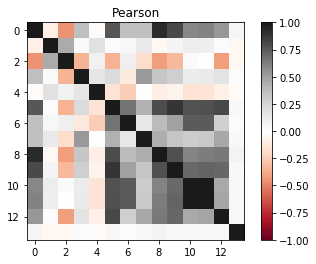

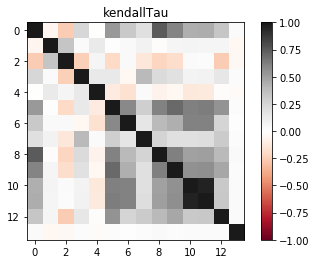

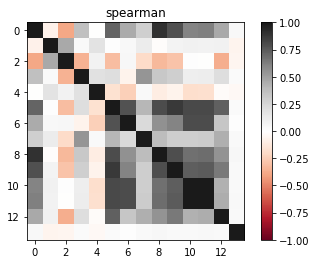

In [22]:
import scipy.stats
import numpy
import matplotlib.pyplot
def Compare(statFunc):
    ret = numpy.zeros((14,14))
    for i in range(14):
        colI = X[X.columns[i]]
        for j in range(14):
            colJ = X[X.columns[j]]

            if (i == j):
                ret[i,j] = 1
            else:
                ret[i,j] = statFunc(colI, colJ)[0]
    return ret
pearson = Compare(scipy.stats.pearsonr)
kendallTau = Compare(scipy.stats.kendalltau)
spearman = Compare(scipy.stats.spearmanr)
matplotlib.pyplot.imshow(pearson, interpolation='nearest', cmap='RdGy',vmin=-1, vmax=1)
matplotlib.pyplot.title('Pearson')
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(kendallTau, interpolation='nearest', cmap='RdGy',vmin=-1, vmax=1)
matplotlib.pyplot.title('kendallTau')
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(spearman, interpolation='nearest', cmap='RdGy',vmin=-1, vmax=1)
matplotlib.pyplot.title('spearman')
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

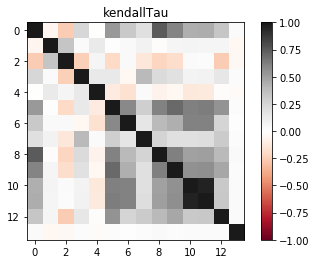

In [17]:
import seaborn as sns


In [18]:
X.columns

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [23]:
spearman

array([[ 1.00000000e+00, -7.70021986e-02, -3.83032647e-01,
         3.61207111e-01, -6.37408676e-03,  7.12909970e-01,
         4.58539463e-01,  2.88394284e-01,  9.06008623e-01,
         7.83018154e-01,  6.08095137e-01,  6.19711964e-01,
         4.62455537e-01,  4.24025862e-02],
       [-7.70021986e-02,  1.00000000e+00,  4.64256861e-01,
         3.40028056e-02,  1.77771341e-01,  1.06561765e-02,
         4.53237117e-02,  1.18683126e-01, -1.19521748e-02,
         7.78434577e-02,  9.09460435e-02,  8.19779371e-02,
         8.68542534e-02, -5.77140803e-02],
       [-3.83032647e-01,  4.64256861e-01,  1.00000000e+00,
        -3.47825408e-01,  7.84525703e-02, -3.09183521e-01,
         5.40070404e-02, -1.89391210e-01, -3.24876660e-01,
        -2.85077379e-01,  1.27193811e-02, -7.34708256e-04,
        -3.66718776e-01, -4.93500361e-02],
       [ 3.61207111e-01,  3.40028056e-02, -3.47825408e-01,
         1.00000000e+00,  1.89698110e-01,  2.05165928e-01,
        -6.38411192e-02,  5.46412071e-01,  3.

Iteration 10: error is 19.328214
Iteration 20: error is 16.576911
Iteration 30: error is 15.108034
Iteration 40: error is 15.024784
Iteration 50: error is 15.125332
Iteration 60: error is 15.209744
Iteration 70: error is 15.220458
Iteration 80: error is 15.219638
Iteration 90: error is 15.217583
Iteration 100: error is 15.217986
Iteration 110: error is 2.004355
Iteration 120: error is 1.580324
Iteration 130: error is 1.355422
Iteration 140: error is 1.220509
Iteration 150: error is 1.132099
Iteration 160: error is 1.069620
Iteration 170: error is 1.022162
Iteration 180: error is 0.987046
Iteration 190: error is 0.959874
Iteration 200: error is 0.937827
Iteration 210: error is 0.920336
Iteration 220: error is 0.906082
Iteration 230: error is 0.894177
Iteration 240: error is 0.884315
Iteration 250: error is 0.875922
Iteration 260: error is 0.868651
Iteration 270: error is 0.862347
Iteration 280: error is 0.857097
Iteration 290: error is 0.852450
Iteration 300: error is 0.848625
Iteration

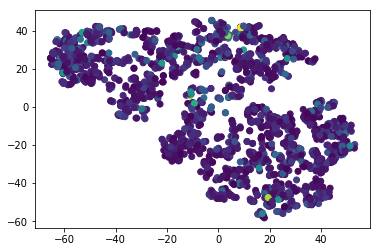

In [33]:
import tsne
t = tsne.tsne(X.loc[::100,:],perplexity = 50.0)
matplotlib.pyplot.scatter(t[:,0], t[:,1], c = y[::100])
matplotlib.pyplot.show()

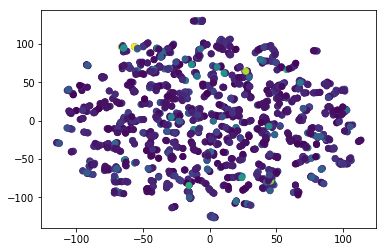

In [32]:
matplotlib.pyplot.scatter(t[:,0], t[:,1], c = y[::100])
matplotlib.pyplot.show()